In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob

ds=pd.read_csv("ted_main.csv")
ds.head(5)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [2]:
df=ds.loc[:,['description','title','speaker_occupation']]
df.head(5)
#df=ds[['description','title','speaker_occupation']]

,description,title,speaker_occupation
0,Sir Ken Robinson makes an entertaining and pro...,Do schools kill creativity?,Author/educator
1,With the same humor and humanity he exuded in ...,Averting the climate crisis,Climate advocate
2,New York Times columnist David Pogue takes aim...,Simplicity sells,Technology columnist
3,"In an emotionally charged talk, MacArthur-winn...",Greening the ghetto,Activist for environmental justice
4,You've never seen data presented like this. Wi...,The best stats you've ever seen,Global health expert; data visionary


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   description         2550 non-null   object
 1   title               2550 non-null   object
 2   speaker_occupation  2544 non-null   object
dtypes: object(3)
memory usage: 59.9+ KB


In [4]:
df['description'][df['speaker_occupation'].isnull()]

1113    After a crisis, how can we tell if water is sa...
1192    The Pirate Party fights for transparency, anon...
1220    As you surf the Web, information is being coll...
1656    In this lovely talk, TED Fellow Ryan Holladay ...
1911    What do you do with an outdated encyclopedia i...
1949    Photographer Boniface Mwangi wanted to protest...
Name: description, dtype: object

In [5]:
df.dropna(axis=0,inplace=True)

In [6]:
df[['speaker_occupation']].isnull().values.any()

False

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2544 entries, 0 to 2549
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   description         2544 non-null   object
 1   title               2544 non-null   object
 2   speaker_occupation  2544 non-null   object
dtypes: object(3)
memory usage: 79.5+ KB


In [8]:
df['speaker_occupation'].value_counts()

Writer                                45
Artist                                34
Designer                              34
Journalist                            33
Entrepreneur                          31
                                      ..
Anti-poverty activist                  1
Artist, musician, lawyer, activist     1
Political scientist and journalist     1
Macroencapsulator                      1
Multi-sense designer                   1
Name: speaker_occupation, Length: 1458, dtype: int64

In [9]:
stop = stopwords.words("english")
df['description'] = df['description'].apply(lambda x: " ".join([word for word in x.split() if word not in (stop)]))
df['title'] = df['title'].apply(lambda x: " ".join([word for word in x.split() if word not in (stop)]))
df['speaker_occupation'] = df['speaker_occupation'].apply(lambda x: " ".join([word for word in x.split() if word not in (stop)]))
df.head()

,description,title,speaker_occupation
0,Sir Ken Robinson makes entertaining profoundly...,Do schools kill creativity?,Author/educator
1,"With humor humanity exuded ""An Inconvenient Tr...",Averting climate crisis,Climate advocate
2,New York Times columnist David Pogue takes aim...,Simplicity sells,Technology columnist
3,"In emotionally charged talk, MacArthur-winning...",Greening ghetto,Activist environmental justice
4,You've never seen data presented like this. Wi...,The best stats ever seen,Global health expert; data visionary


In [10]:
ps = PorterStemmer()
df['description'] = df['description'].apply(lambda x : ' '.join([ps.stem(word) for word in x.split()]))
df['title'] = df['title'].apply(lambda x : ' '.join([ps.stem(word) for word in x.split()]))
df['speaker_occupation'] = df['speaker_occupation'].apply(lambda x : ' '.join([ps.stem(word) for word in x.split()]))
df.head()

,description,title,speaker_occupation
0,sir ken robinson make entertain profoundli mov...,Do school kill creativity?,author/educ
1,"with humor human exud ""an inconveni truth,"" Al...",avert climat crisi,climat advoc
2,new york time columnist david pogu take aim te...,simplic sell,technolog columnist
3,"In emot charg talk, macarthur-win activist maj...",green ghetto,activist environment justic
4,you'v never seen data present like this. with ...,the best stat ever seen,global health expert; data visionari


In [11]:
lemma = WordNetLemmatizer()
df['description'] = df['description'].apply(lambda x : ' '.join([lemma.lemmatize(word) for word in x.split()]))
df['title'] = df['title'].apply(lambda x : ' '.join([lemma.lemmatize(word) for word in x.split()]))
df['speaker_occupation'] = df['speaker_occupation'].apply(lambda x : ' '.join([lemma.lemmatize(word) for word in x.split()]))
df.head()


,description,title,speaker_occupation
0,sir ken robinson make entertain profoundli mov...,Do school kill creativity?,author/educ
1,"with humor human exud ""an inconveni truth,"" Al...",avert climat crisi,climat advoc
2,new york time columnist david pogu take aim te...,simplic sell,technolog columnist
3,"In emot charg talk, macarthur-win activist maj...",green ghetto,activist environment justic
4,you'v never seen data present like this. with ...,the best stat ever seen,global health expert; data visionari


In [12]:
def punct(text):
    text = re.sub('http://[A-Za-z0-9./]+','',text) #removes any https links
    text = re.sub('[0-9]', '',text) #removes numbers
    text = re.sub("[^a-zA-Z0-9]", " ",text) #removes special characters
    return text
for i in df:
    df[i] = df[i].apply(punct)
df.head()

,description,title,speaker_occupation
0,sir ken robinson make entertain profoundli mov...,Do school kill creativity,author educ
1,with humor human exud an inconveni truth Al...,avert climat crisi,climat advoc
2,new york time columnist david pogu take aim te...,simplic sell,technolog columnist
3,In emot charg talk macarthur win activist maj...,green ghetto,activist environment justic
4,you v never seen data present like this with ...,the best stat ever seen,global health expert data visionari


In [13]:
df['description'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    sir ken robinson make entertain profoundly mov...
1    with humor human exude  an inconveni truth   L...
2    new york time columns david you take aim techn...
3    In mot charge talk  macarthur win activist maj...
4    you v never seen data present like this  with ...
Name: description, dtype: object

In [14]:
df['title'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    To school kill creativity 
1          avert climate crisis
2                   simple sell
3                   green hetty
4      the best state ever seen
Name: title, dtype: object

In [15]:
df['speaker_occupation'][:5].apply(lambda x: str(TextBlob(x).correct()))

0                              author duc
1                          climate advice
2                      technology columns
3            activist environment justice
4    global health expert  data visionary
Name: speaker_occupation, dtype: object

In [16]:
for i in df:
    df[i] = df[i].apply(lambda x: " ".join([word.upper() for word in x.split()]))
df.head()

,description,title,speaker_occupation
0,SIR KEN ROBINSON MAKE ENTERTAIN PROFOUNDLI MOV...,DO SCHOOL KILL CREATIVITY,AUTHOR EDUC
1,WITH HUMOR HUMAN EXUD AN INCONVENI TRUTH AL GO...,AVERT CLIMAT CRISI,CLIMAT ADVOC
2,NEW YORK TIME COLUMNIST DAVID POGU TAKE AIM TE...,SIMPLIC SELL,TECHNOLOG COLUMNIST
3,IN EMOT CHARG TALK MACARTHUR WIN ACTIVIST MAJO...,GREEN GHETTO,ACTIVIST ENVIRONMENT JUSTIC
4,YOU V NEVER SEEN DATA PRESENT LIKE THIS WITH D...,THE BEST STAT EVER SEEN,GLOBAL HEALTH EXPERT DATA VISIONARI


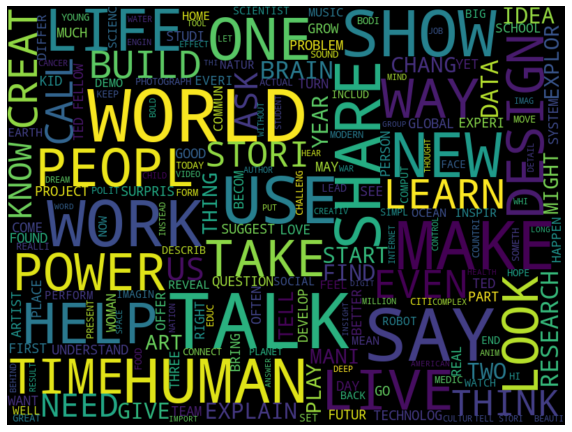

In [17]:
pos = ' '.join([text for text in df['description']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=600, random_state=21, max_font_size=110).generate(pos)

plt.figure(figsize=(10, 11))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

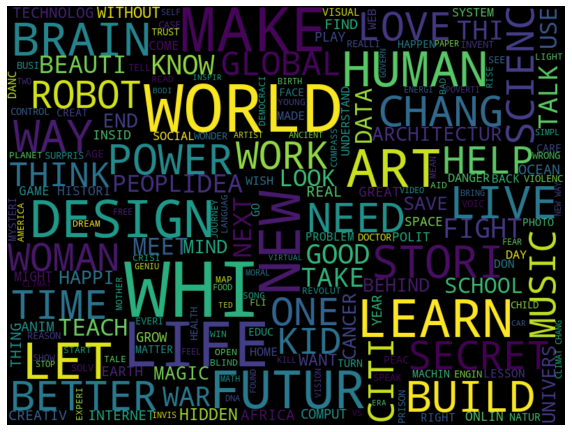

In [18]:
pos = ' '.join([text for text in df['title']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=600, random_state=21, max_font_size=110).generate(pos)

plt.figure(figsize=(10, 11))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

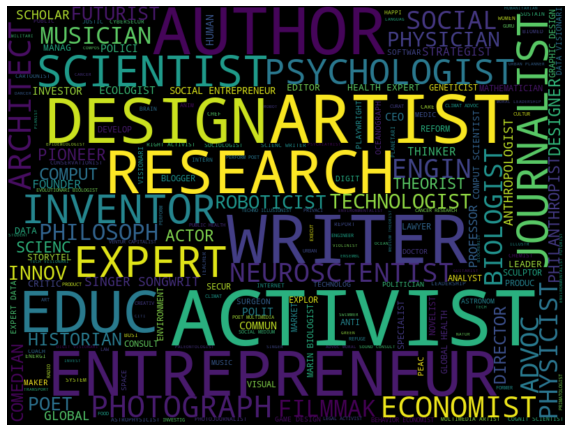

In [19]:
pos = ' '.join([text for text in df['speaker_occupation']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=600, random_state=21, max_font_size=110).generate(pos)

plt.figure(figsize=(10, 11))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()